# Vehicle Price Prediction Dataset

**Introducción:**

Este análisis exploratorio de datos (EDA) tiene como objetivo comprender mejor el mercado actual de vehículos nuevos (años 2023–2025) a partir de un conjunto de datos que incluye información técnica y comercial como marca, tipo de combustible, carrocería, tracción, transmisión, número de cilindros, kilometraje y precio. A través de visualizaciones y estadísticas descriptivas, se busca identificar patrones, relaciones y posibles factores que influyen en el precio de los vehículos.

**Objetivo:**

El propósito principal de este análisis es:

Explorar la distribución de precios de los vehículos nuevos.

Analizar cómo diferentes características (motor, combustible, transmisión, etc.) impactan el precio.

Visualizar tendencias por marca y tipo de carrocería.

Preparar el terreno para futuros modelos de predicción o segmentación de mercado.

**Introduction:**

This exploratory data analysis (EDA) aims to better understand the current market for new vehicles (model years 2023–2025) using a dataset that includes technical and commercial information such as brand, fuel type, body style, drivetrain, transmission, number of cylinders, mileage, and price. Through visualizations and descriptive statistics, the analysis seeks to identify patterns, relationships, and potential factors influencing vehicle prices.

**Objective:**

The main goals of this analysis are to:

Explore the price distribution of new vehicles.

Analyze how various features (engine, fuel type, transmission, etc.) affect pricing.

Visualize trends by brand and body type.

Lay the groundwork for future predictive models or market segmentation.

In [35]:
library(tidyverse)
library(skimr)
library(janitor)

# Cargar los datos
vehiculos <- read_csv("/kaggle/input/vehicle-price-prediction-dataset/Vehicle Price.csv")

# Limpieza de nombres de columnas
vehiculos <- vehiculos %>% clean_names()

# Vista general
glimpse(vehiculos)

# Estadísticas básicas
skim(vehiculos)

Rows: 1002 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): name, description, make, model, engine, fuel, transmission, trim, ...
dbl  (5): year, price, cylinders, mileage, doors

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,002
Columns: 17
$ name           <chr> "2024 Jeep Wagoneer Series II", "2024 Jeep Grand Cherok…
$ description    <chr> "\n      \n        Heated Leather Seats, Nav System, Mo…
$ make           <chr> "Jeep", "Jeep", "GMC", "Dodge", "RAM", "Nissan", "Jeep"…
$ model          <chr> "Wagoneer", "Grand Cherokee", "Yukon XL", "Durango", "3…
$ year           <dbl> 2024, 2024, 2024, 2023, 2024, 2024, 2024, 2024, 2024, 2…
$ price          <dbl> 74600, 50170, 96410, 46835, 81663, 46000, 63862, 89978,…
$ engine         <chr> "24V GDI DOHC Twin Turbo", "OHV", "6.2L V-8 gasoline di…
$ cylinders      <dbl> 6, 6, 8, 8, 6, 6, 6, 8, 4, 6, 4, 6, 4, 6, NA, 4, 6, 4, …
$ fuel           <chr> "Gasoline", "Gasoline", "Gasoline", "Gasoline", "Diesel…
$ mileage        <dbl> 10, 1, 0, 32, 10, 3838, 5, 15, 5, 20, 0, 532, 1, 12, 4,…
$ transmission   <chr> "8-Speed Automatic", "8-Speed Automatic", "Automatic", …
$ trim           <chr> "Series II", "Laredo", "Denali", "Pursuit", "Laramie", …
$ body          

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 17' in coercion to 'logical(1)'


**Valores faltantes importantes:**

price: 23 faltantes → críticos para modelado, se deben eliminar o imputar si hay lógica.

cylinders: 105 faltantes → imputables si se puede inferir por engine o model, si no, eliminar.

mileage: 34 faltantes → pueden eliminarse o imputarse si son pocos.

description: 56 faltantes → no crítica si no se usa para análisis de texto.

interior_color: 38 faltantes → no crítica a menos que sea relevante.

**Valores extremos o sospechosos**

price tiene valores de 0, lo cual no es realista → posible limpieza.

mileage llega hasta 9711, pero muchos tienen valores como 0 o 1 → parece que son autos nuevos.

In [36]:
# Eliminar registros con price faltante o igual a 0
vehiculos <- vehiculos %>%
  filter(!is.na(price), price > 0, !is.na(mileage), !is.na(year))

# Convertir columnas a factor
vehiculos <- vehiculos %>%
  mutate(across(c(make, model, fuel, transmission, trim, body,
                  drivetrain, exterior_color, interior_color), as.factor))

# Revisar nuevamente dimensiones y NA
summary(vehiculos)


     name           description             make               model    
 Length:944         Length:944         Jeep   :177   Hornet       : 59  
 Class :character   Class :character   Hyundai:119   3500         : 50  
 Mode  :character   Mode  :character   Dodge  :109   Compass      : 44  
                                       Ford   : 82   Durango      : 39  
                                       RAM    : 77   CX-90 PHEV   : 34  
                                       Kia    : 51   Tucson Hybrid: 32  
                                       (Other):329   (Other)      :686  
      year          price           engine            cylinders    
 Min.   :2023   Min.   : 17994   Length:944         Min.   :0.000  
 1st Qu.:2024   1st Qu.: 36588   Class :character   1st Qu.:4.000  
 Median :2024   Median : 47154   Mode  :character   Median :4.000  
 Mean   :2024   Mean   : 50307                      Mean   :4.988  
 3rd Qu.:2024   3rd Qu.: 58935                      3rd Qu.:6.000  
 Max.   

# Distribucion de Precios

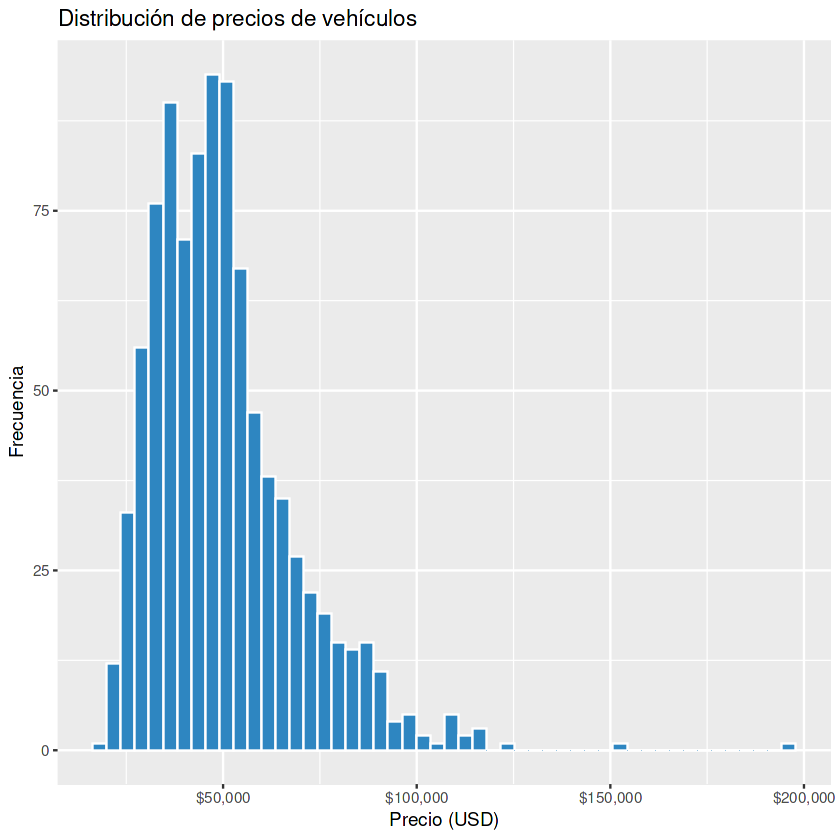

In [37]:
library(ggplot2)
ggplot(vehiculos, aes(x = price)) +
  geom_histogram(bins = 50, fill = "#2E86C1", color = "white") +
  scale_x_continuous(labels = scales::dollar) +
  labs(title = "Distribución de precios de vehículos", x = "Precio (USD)", y = "Frecuencia")

**Observaciones clave:**

**Distribución sesgada a la derecha (positivamente):**

La mayoría de los vehículos tienen precios entre 30,000 y 70,000.

Hay una larga cola hacia la derecha → pocos autos de lujo con precios muy altos (hasta casi $200,000).

**Pico principal:**

El punto más frecuente está alrededor de 45,000 – 55,000, lo que puede interpretarse como el rango más común de vehículos (SUVs de gama media, pickups modernas, etc.).

**Outliers posibles:**

Algunos vehículos por encima de $120,000 pueden ser autos de lujo (p. ej. BMW X7, RAM 3500, etc.), y pueden influir en análisis de regresión si no se ajustan o tratan como casos especiales.

# Precio por tipo de combustible

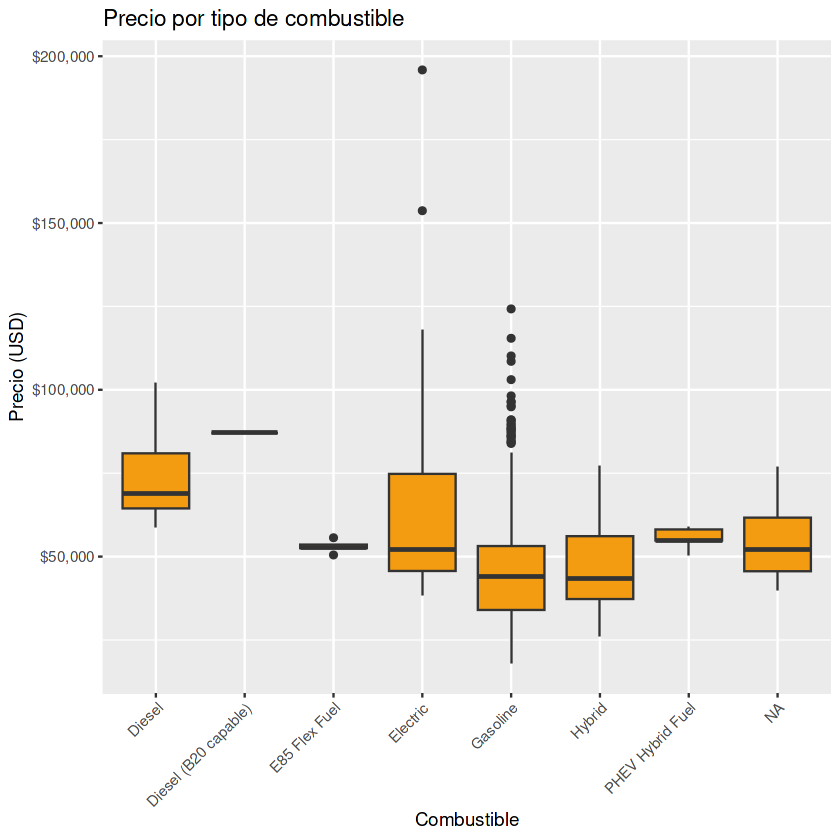

In [38]:
ggplot(vehiculos, aes(x = fuel, y = price)) +
  geom_boxplot(fill = "#F39C12") +
  scale_y_continuous(labels = scales::dollar) +
  labs(title = "Precio por tipo de combustible", x = "Combustible", y = "Precio (USD)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

**Observaciones clave:**

**Vehículos eléctricos:**

Tienen una dispersión muy alta, incluyendo algunos de los autos más caros del dataset (hasta ~$200,000).

Mediana notablemente más alta que gasolina o híbridos.

**Gasolina:**

Gran cantidad de observaciones, mediana más baja (~$45,000 aprox).

Muchos outliers hacia arriba, lo cual indica variedad en esta categoría (desde económicos hasta autos premium).

**Diesel:**

Precio medianamente alto y menos dispersión.

“Diesel (B20 Capable)” tiene pocos datos, pero parece agrupar modelos caros.

**Híbridos y PHEV:**

Precios más contenidos.

PHEV (Plug-in Hybrid) parece más caro que los híbridos tradicionales.

**E85 Flex Fuel y NA:**

Muy pocos datos, pero ubicados en rangos medios.

# Precio vs Kilometraje

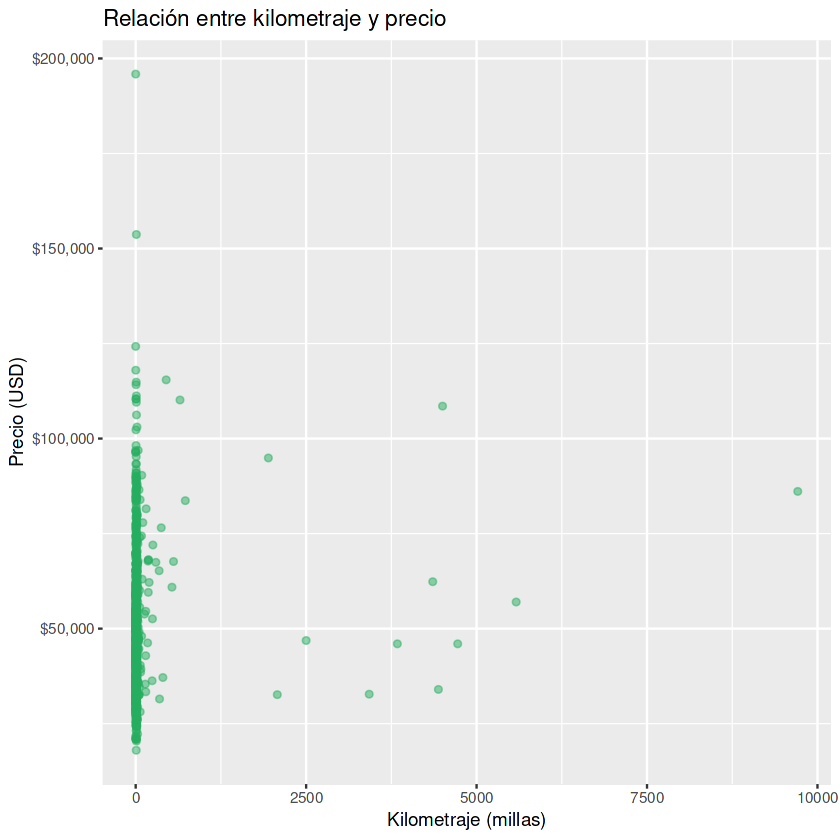

In [39]:
ggplot(vehiculos, aes(x = mileage, y = price)) +
  geom_point(alpha = 0.5, color = "#27AE60") +
  scale_y_continuous(labels = scales::dollar) +
  labs(title = "Relación entre kilometraje y precio", x = "Kilometraje (millas)", y = "Precio (USD)")

**Observaciones clave:**

**Alta concentración en kilometraje bajo:**

La mayoría de los vehículos tienen menos de 500 millas, muchos incluso están en 0–50 millas.

Esto indica que la base de datos contiene vehículos nuevos o casi nuevos.

**No hay una relación lineal clara:**

A pesar de lo esperado (menor kilometraje → mayor precio), aquí la mayoría tiene kilometraje bajo, lo que limita la capacidad del gráfico para mostrar esa relación.

**Outliers interesantes:**

Hay pocos vehículos con kilometraje por encima de 5,000 o incluso 9,000 millas, que se alejan del patrón general.

Algunos de estos aún tienen precios elevados, lo que puede sugerir modelos de lujo que no pierden valor tan rápido.

# Precio por tipo de carroceria

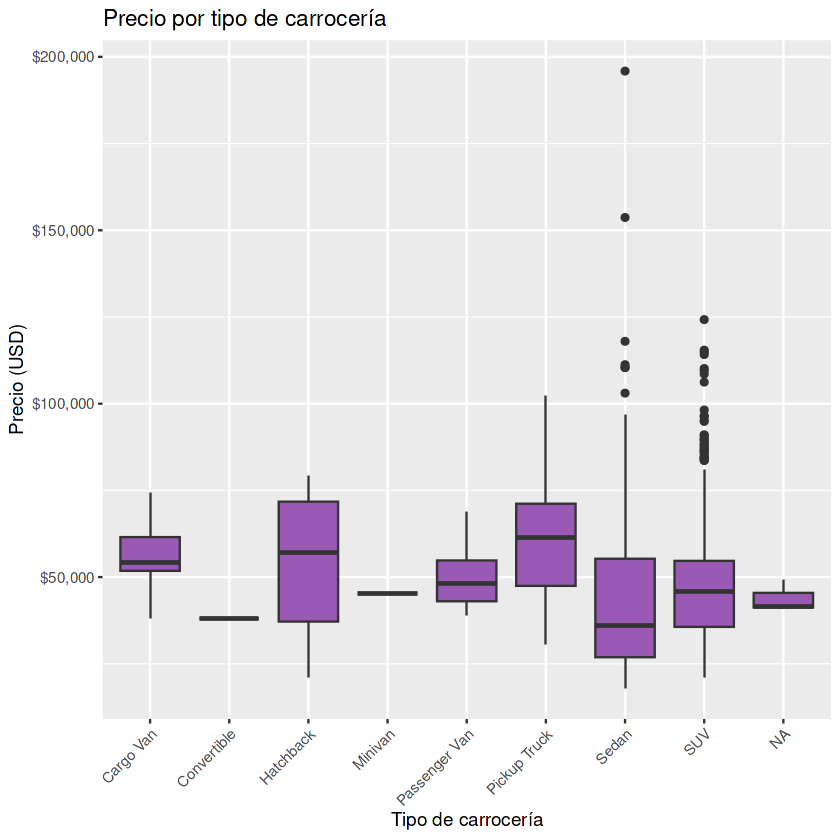

In [40]:
ggplot(vehiculos, aes(x = body, y = price)) +
  geom_boxplot(fill = "#9B59B6") +
  scale_y_continuous(labels = scales::dollar) +
  labs(title = "Precio por tipo de carrocería", x = "Tipo de carrocería", y = "Precio (USD)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


**Observaciones clave:**
 
**SUVs y Pickup Trucks:**

Presentan una alta dispersión y muchos outliers, con precios que alcanzan los $200,000.

Esto sugiere una gran variedad de modelos, desde básicos hasta versiones de lujo.

**Hatchbacks y Convertibles:**

Pocas observaciones, pero en el caso de los hatchbacks hay una mediana muy alta, con bastante variación. Puede haber algún error de codificación o modelos premium clasificados como hatchback.

**Sedanes:**

Son más baratos en general, con muchos registros por debajo de $50,000.

Mediana más baja que SUVs y pickups.

**Cargo Vans y Passenger Vans:**

Tienen precios bastante uniformes, sin valores extremos.

Generalmente orientadas a trabajo o transporte, lo cual explica su estabilidad de precio.

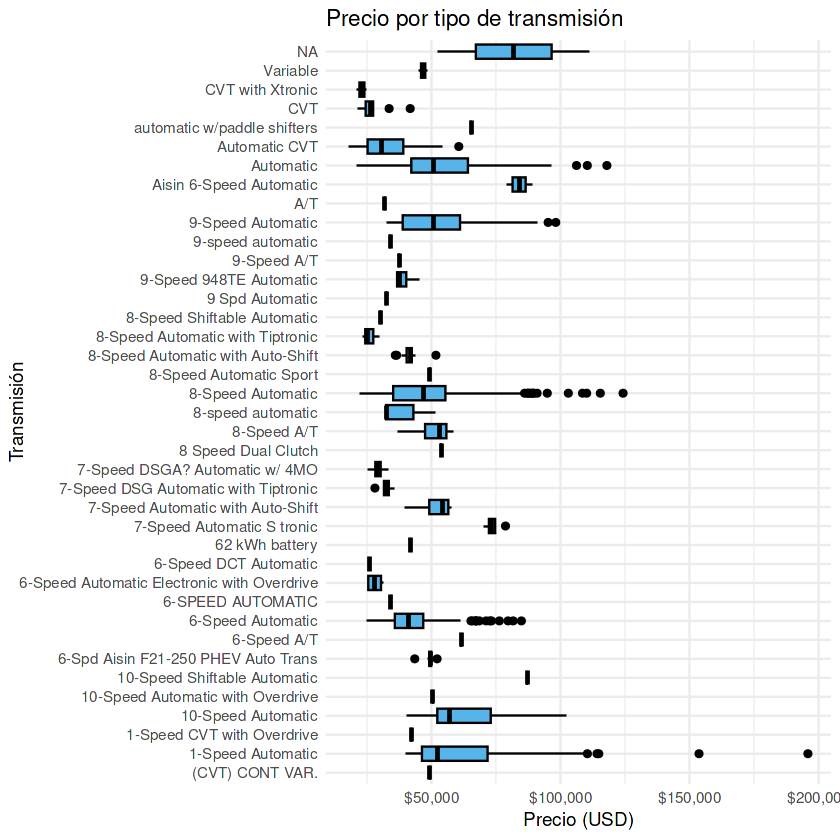

In [41]:
library(ggplot2)

ggplot(vehiculos, aes(x = transmission, y = price)) +
  geom_boxplot(fill = "#56B4E9", color = "black") +
  coord_flip() +
  scale_y_continuous(labels = scales::dollar) +
  labs(
    title = "Precio por tipo de transmisión",
    x = "Transmisión",
    y = "Precio (USD)"
  ) +
  theme_minimal()

**Observaciones relevantes:**

Las transmisiones automáticas (de varias velocidades) dominan el dataset.

Algunas versiones como 8-Speed Automatic Sport o 10-Speed Automatic tienen rangos de precios más altos y dispersión notable.

Las transmisiones CVT (transmisión variable continua) tienden a estar asociadas con precios más bajos.

Se detectan valores atípicos (outliers) sobre todo en transmisiones automáticas avanzadas.

El tipo de transmisión está altamente diversificado (más de 30 categorías), lo cual puede generar ruido si no se agrupan.

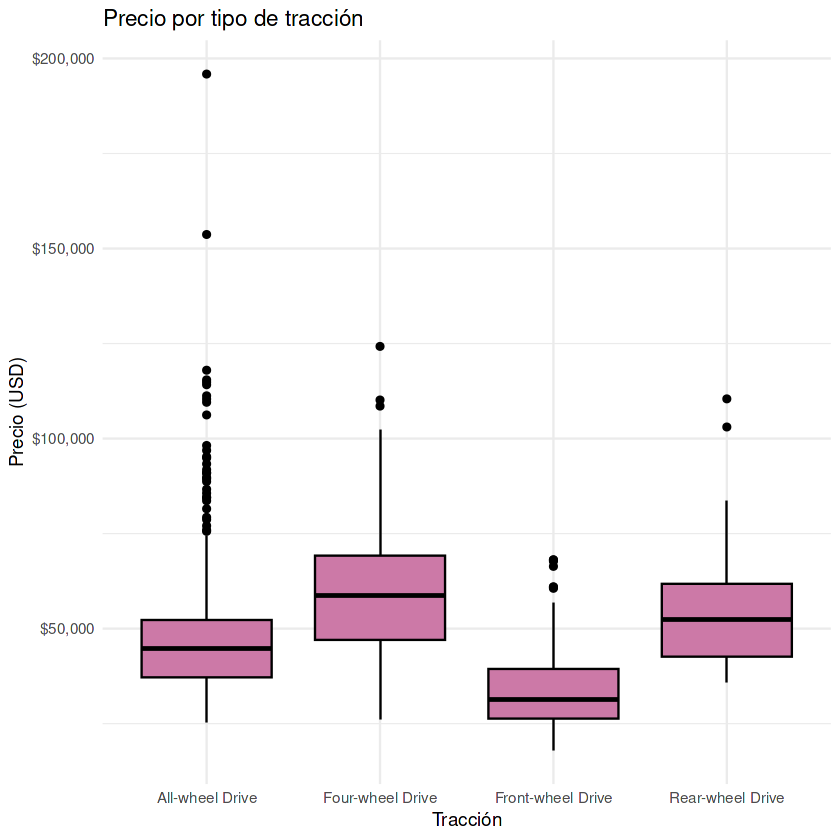

In [42]:
ggplot(vehiculos, aes(x = drivetrain, y = price)) +
  geom_boxplot(fill = "#CC79A7", color = "black") +
  scale_y_continuous(labels = scales::dollar) +
  labs(
    title = "Precio por tipo de tracción",
    x = "Tracción",
    y = "Precio (USD)"
  ) +
  theme_minimal()

**All-wheel Drive (AWD):**
 
Tiene precios medianos relativamente altos.

Amplio rango de precios, con varios vehículos en el rango alto (> $100K).

**Four-wheel Drive (4WD):**

Tiende a mostrar los precios más altos en promedio.

Amplia dispersión y presencia de vehículos de lujo o todoterreno.

**Front-wheel Drive (FWD):**

Los precios son significativamente más bajos, con menor dispersión.

Posiblemente vehículos económicos y urbanos.

**Rear-wheel Drive (RWD):**

Media por encima de FWD.



Selecting by n


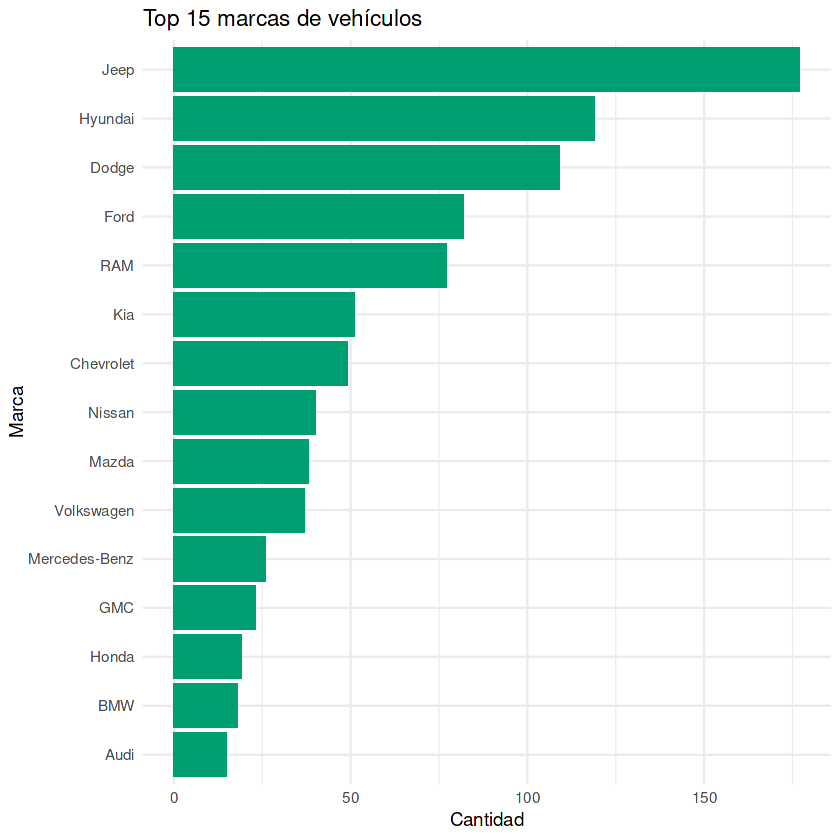

In [43]:
library(dplyr)
library(ggplot2)

vehiculos %>%
  count(make, sort = TRUE) %>%
  top_n(15) %>%
  ggplot(aes(x = reorder(make, n), y = n)) +
  geom_bar(stat = "identity", fill = "#009E73") +
  coord_flip() +
  labs(title = "Top 15 marcas de vehículos", x = "Marca", y = "Cantidad") +
  theme_minimal()


Jeep domina el dataset con diferencia, seguido por Dodge, Hyundai, y RAM.

Las marcas más populares en esta base parecen concentrarse en vehículos utilitarios, SUV y pickups.

También aparecen marcas de gama alta en menor cantidad, como Mercedes-Benz, BMW, y Audi.

Esto nos da una idea clara de la representación de fabricantes: hay un fuerte sesgo hacia marcas americanas y asiáticas de consumo masivo.

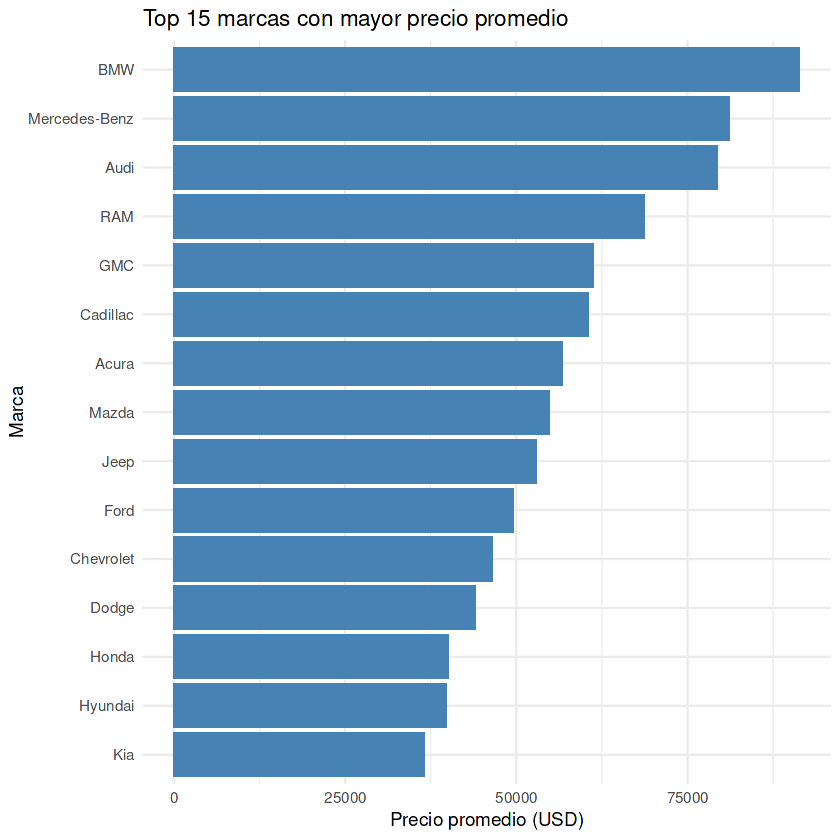

In [44]:
vehiculos %>%
  group_by(make) %>%
  summarise(promedio_precio = mean(price, na.rm = TRUE),
            conteo = n()) %>%
  filter(conteo >= 10) %>%  # para evitar sesgo por muy pocos registros
  arrange(desc(promedio_precio)) %>%
  top_n(15, promedio_precio) %>%
  ggplot(aes(x = reorder(make, promedio_precio), y = promedio_precio)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(title = "Top 15 marcas con mayor precio promedio",
       x = "Marca", y = "Precio promedio (USD)") +
  theme_minimal()

Mercedes-Benz lidera como la marca con el precio promedio más alto, lo cual es consistente con su segmento premium.

RAM, GMC, Acura y Mazda también tienen precios promedios altos, probablemente debido a modelos SUV, pickups o versiones de lujo.

Marcas como Volkswagen, Nissan, Kia y Hyundai aparecen al final, alineadas con su orientación más accesible o de gama media.

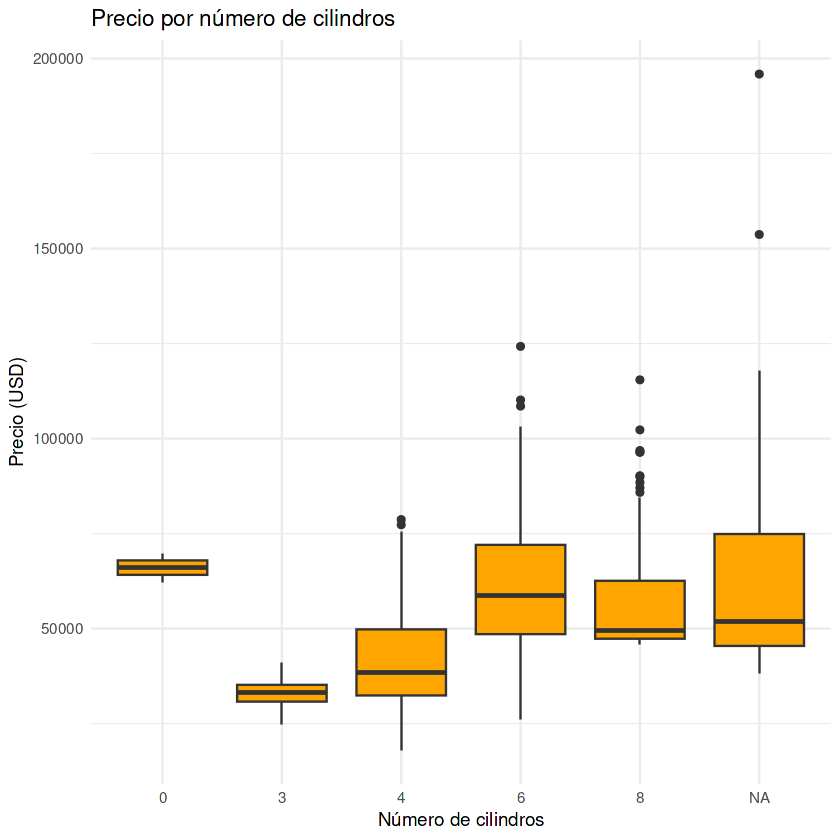

In [45]:
ggplot(vehiculos, aes(x = factor(cylinders), y = price)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Precio por número de cilindros",
       x = "Número de cilindros", y = "Precio (USD)") +
  theme_minimal()

Vehículos con 0 cilindros (probablemente eléctricos) tienen precios altos y consistentes.

3 cilindros tienden a ser los más económicos.

A medida que aumenta el número de cilindros (4, 6, 8), el precio promedio también aumenta, aunque con mayor dispersión.

6 cilindros muestran la mayor varianza, indicando una mezcla de modelos medianos y de lujo.

8 cilindros también tienen valores altos, pero el rango medio es un poco más bajo que el de 6, lo cual puede deberse a pickups de alto cilindraje pero menor precio.

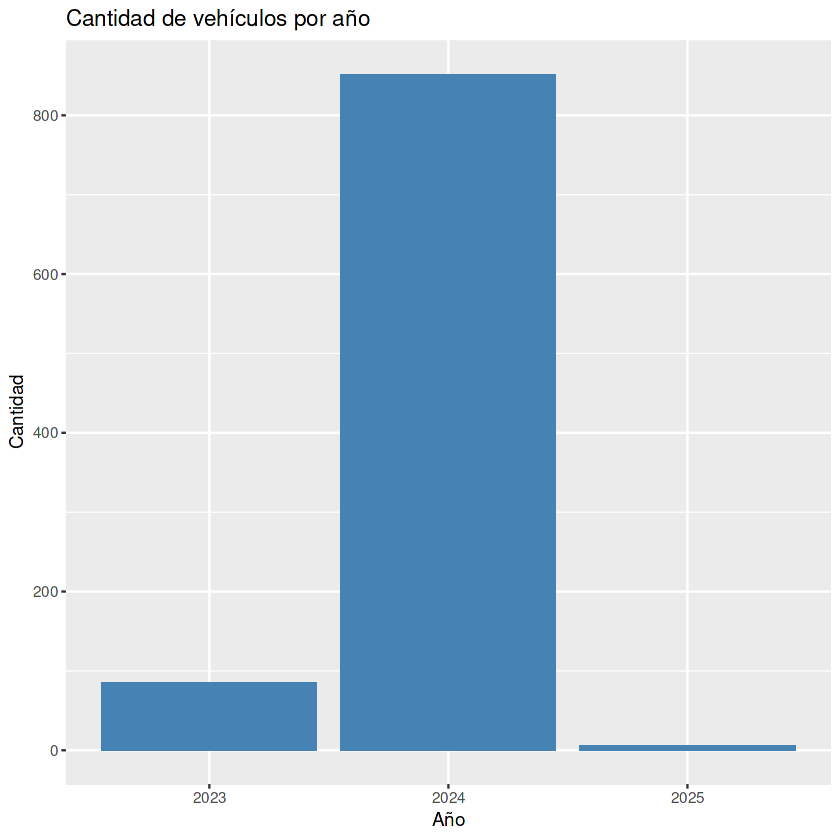

In [46]:
ggplot(vehiculos, aes(x = factor(year))) +
  geom_bar(fill = "steelblue") +
  labs(title = "Cantidad de vehículos por año", x = "Año", y = "Cantidad")

Se observa una mayor cantidad de vehiculos para el año 2024